##### Importing the libraries for Data Science

# Analyzing Coronavirus with Data science

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pycountry
import geopandas as gpd
from sklearn import linear_model
from sklearn.model_selection import train_test_split

###### Checking and then cleaning the data

In [2]:
df = pd.read_csv('covid_19_clean_complete.csv')
pd.options.display.max_rows = 300
df


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


##### CHECKING IF THERE IS ANY CLEANING NEEDED 
###### ChECKING FOR NULL VALUES IN THE DATAFRAME

In [3]:
null_values = pd.isnull(df)
null_values

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,True,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
49063,True,False,False,False,False,False,False,False,False,False
49064,True,False,False,False,False,False,False,False,False,False
49065,True,False,False,False,False,False,False,False,False,False
49066,True,False,False,False,False,False,False,False,False,False


##### REPLACING NAN with whole_country
### adding months columns
#### Adding the months e-g Jan , feb upto Dec for easy understanding

In [4]:
def months(df_object):
    month = df_object['Date'][5:7]
    
    if month == '01':
        return 'January'
    elif month == '02':
        return 'February'
    elif month == '03':
        return 'March'
    elif month == '04':
        return 'April'
    elif month == '05':
        return 'May'
    elif month == '06':
        return 'June'
    elif month == '07':
        return 'July'
    elif month == '08':
        return 'August'
    elif month == '09':
        return 'September'
    elif month == '10':
        return 'October'
    elif month == '11':
        return 'November'
    elif month == '12':
        return 'December'
    
new_df = df.fillna('Unknown_Province')
#groups = new_df.groupby('Province/State')
#print(groups.first())
new_df['Month'] = df.apply(months,axis= 1) #adding the months columns  
new_df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Month
0,Unknown_Province,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,January
1,Unknown_Province,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,January
2,Unknown_Province,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,January
3,Unknown_Province,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,January
4,Unknown_Province,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,January
...,...,...,...,...,...,...,...,...,...,...,...
49063,Unknown_Province,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,July
49064,Unknown_Province,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,July
49065,Unknown_Province,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,July
49066,Unknown_Province,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,July


In [5]:
#changing the column names
new_df.rename(columns={'Country/Region':'Country','Lat':'Latitude','Long':'Longitude'},inplace=True)
new_df


,Province/State,Country,Latitude,Longitude,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Month
0,Unknown_Province,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,January
1,Unknown_Province,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,January
2,Unknown_Province,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,January
3,Unknown_Province,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,January
4,Unknown_Province,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,January
...,...,...,...,...,...,...,...,...,...,...,...
49063,Unknown_Province,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,July
49064,Unknown_Province,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,July
49065,Unknown_Province,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,July
49066,Unknown_Province,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,July


### Plotting the graph of cases against months 

/tmp/ipykernel_11725/4036334848.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  month_wise_case = new_df.groupby('Month')['Confirmed','Recovered','Deaths','Active'].sum()


<BarContainer object of 7 artists>

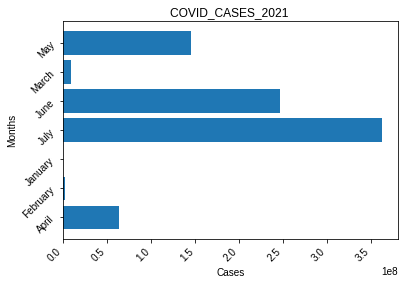

In [6]:
%matplotlib inline
#month_wise cases 
month_wise_case = new_df.groupby('Month')['Confirmed','Recovered','Deaths','Active'].sum()
#month_wise_case.plot()
month_wise_case.reset_index(level=0, inplace=True)
month_wise_case.to_csv('MonthWiseCases.csv',columns=['Month','Confirmed','Recovered','Deaths','Active'] ,index = False)
month_data = pd.read_csv('MonthWiseCases.csv')
#PLOTTING_CASES_MONTH_WISE

months = month_data['Month'].tolist()
confirmed_cases = month_data['Confirmed'].tolist()
#print(months)
#print(confirmed_cases)

fig, ax = plt.subplots()
plt.xlabel('Cases')
plt.ylabel('Months')
plt.title('COVID_CASES_2021 ')
xlabels = ax.get_xticklabels()
ylabels = ax.get_yticklabels()
plt.setp([xlabels,ylabels], rotation=45, horizontalalignment='right')
plt.style.use('seaborn-white')
#plt.xticks(confirmed_cases)
ax.barh(months,confirmed_cases)


#### Plotting the graph for monthly recovered,deaths and active cases

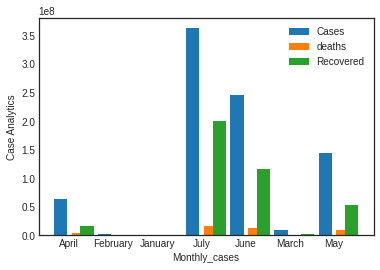

In [7]:
deaths = month_data['Deaths'].tolist()
recovered = month_data['Recovered'].tolist()
active = month_data['Active'].tolist()

#plotting the bar_chart
xpos = np.arange(len(months))
ypos = np.arange(len(confirmed_cases))
#plt.yticks(ypos,confirmed_cases)
plt.xticks(xpos,months)
plt.ylabel('Case Analytics')
plt.xlabel('Monthly_cases')
plt.bar(xpos-0.2,confirmed_cases,label='Cases',width=0.3)
plt.bar(xpos+0.2,deaths,label='deaths',width=0.3)

plt.bar(xpos+0.4,recovered,label='Recovered',width=0.3)
plt.legend()


### GETTING THE MAX_MONTH_WISE FROM ALL OVER THE WORLD
    #> getting all the confirmed cases from all over the world 

In [8]:
all_cases = new_df['Confirmed'].sum() 
all_cases

828508482

### TOTAL CASES => 49068


##### HOW MANY CASES ARE THERE MONTH_WISE 

In [9]:
confirmed_month_wise_cases = new_df.groupby('Month')['Confirmed'].sum() 
confirmed_month_wise_cases

Month
April        63391662
February      1663437
January         38534
July        362895848
June        246525787
March         9002815
May         144990399
Name: Confirmed, dtype: int64

#### cases all over the world

In [10]:
#getting the confirmed,recovered,death cases
overall_confirmed_cases = new_df['Confirmed'].sum()
overallrecovered_cases = new_df['Recovered'].sum()
overall_deaths = new_df['Deaths'].sum()

#making an numpy array to make a series
np_arr = np.array([ overall_confirmed_cases, overallrecovered_cases, overall_deaths])
#series to show the confirmed , recovered , deaths cases

data_series = pd.Series(np_arr, index=['Confirmed','Recovered','Deaths'])
data_series

Confirmed    828508482
Recovered    388408229
Deaths        43384903
dtype: int64

## Countries with max_confirmed cases//

In [11]:

make_group = new_df.groupby('Country').sum()
make_group.head()

,Latitude,Longitude,Confirmed,Deaths,Recovered,Active
Country,,,,,,
Afghanistan,6380.55268,12729.471164,1936390,49098,798240,1089052
Albania,7736.82040,3791.640400,196702,5708,118877,72117
Algeria,5270.37320,312.004800,1179755,77972,755897,345886
Andorra,7991.18440,286.098400,94404,5423,69074,19907
Angola,-2106.10760,3360.293200,22662,1078,6573,15011


### It can be seen that  avg Recovered >= avg Death

In [12]:
#getting the avg of recovered and deaths
death_avg = new_df['Deaths'].mean()
print(death_avg)

recovered_avg = new_df['Recovered'].mean()
print(recovered_avg)

884.1791595337083
7915.713479253282


#### MAKING A NEW_DATAFRAME ( with country , confirmed , deaths , recovered , active ) 
#### Added a new_column for death ratio in every_country

In [13]:

data_frame = new_df.groupby('Country').sum() #grouped every single country and sum all the cases....

data_frame['DeathRatio'] = data_frame['Deaths']/data_frame['Confirmed']

data_frame.reset_index(level=0, inplace=True)
data_frame.to_csv('new_corona.csv',columns=['Country','Confirmed','Deaths','Recovered','Active','Longitude','Latitude','DeathRatio'],index=False)
data_frame

,Country,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,DeathRatio
0,Afghanistan,6380.552680,12729.471164,1936390,49098,798240,1089052,0.025355
1,Albania,7736.820400,3791.640400,196702,5708,118877,72117,0.029019
2,Algeria,5270.373200,312.004800,1179755,77972,755897,345886,0.066092
3,Andorra,7991.184400,286.098400,94404,5423,69074,19907,0.057445
4,Angola,-2106.107600,3360.293200,22662,1078,6573,15011,0.047569
5,Antigua and Barbuda,3207.430400,-11617.723200,4487,326,2600,1561,0.072654
6,Argentina,-7222.226800,-11959.939600,4450658,97749,1680024,2672885,0.021963
7,Armenia,7532.990800,8467.181600,1587173,27089,857482,702602,0.017067
8,Australia,-48287.837600,212598.653200,960247,11387,711928,236932,0.011858
9,Austria,8933.045600,2735.418800,2034986,71390,1638380,325216,0.035081


## plotting the graph of confirmed and death cases in all over the world

<AxesSubplot:xlabel='Cases', ylabel='Legend Peaks'>

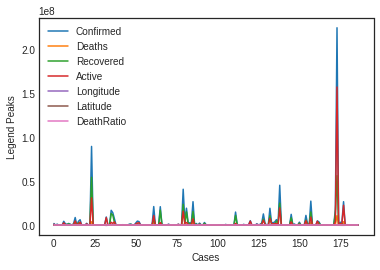

In [14]:
new_data = pd.read_csv('new_corona.csv')

#confirmed_case = np.array([new_data['Confirmed']])
#death = np.array([new_data['Deaths']])
%matplotlib inline
new_data.plot(xlabel='Cases',ylabel='Legend Peaks')


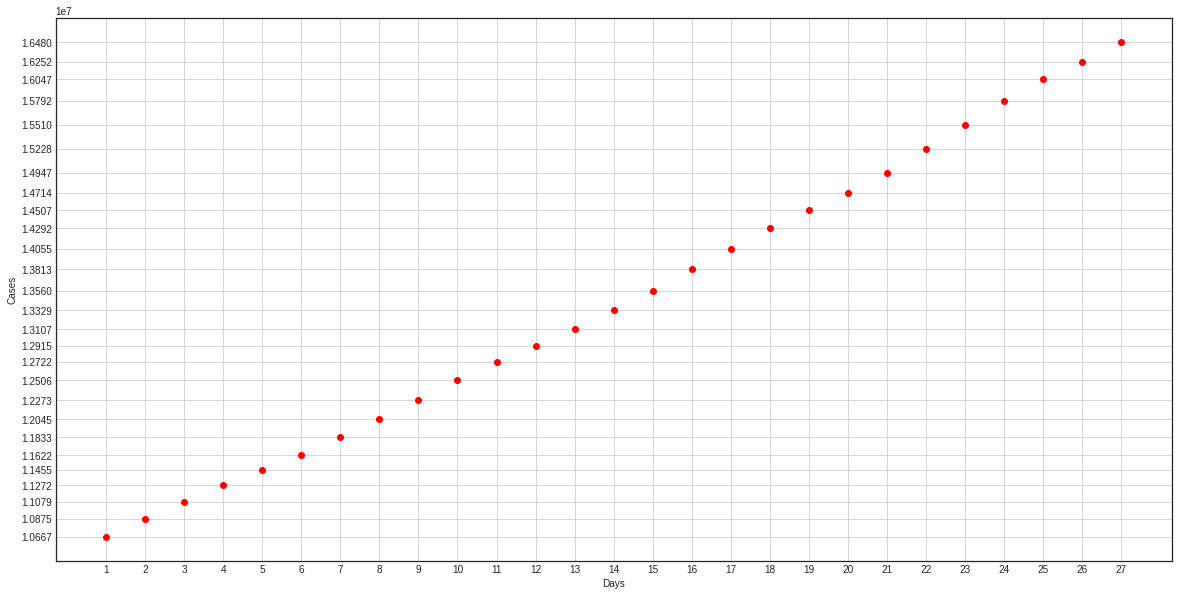

In [15]:

month= new_df[new_df['Month']== 'July' ]['Date'].str[-2:].unique()
cases = new_df[new_df['Month']== 'July'].groupby('Date')['Confirmed'].sum()

days = np.arange(1,len(month.tolist())+1)
#month_arr
cases_arr = np.arange(1,len(cases)+1)
raw_data = {'days':list(days),
           'cases':cases.tolist()
           }
#making a new_data_frame for prediction
cases_on_dates = pd.DataFrame(raw_data,columns=['days','cases'])
cases_on_dates.to_csv('cases_on_dates.csv',index=False)

%matplotlib inline 
plt.figure(figsize=(20,10))
plt.xticks(days,label='cases')
plt.yticks(cases.tolist(),label='days')
plt.scatter(days,cases,color='Red')

plt.xlabel('Days')
plt.ylabel('Cases')
plt.grid()



##### Now the task is to predict the cases on 28th day.
#### Applying Linear Regression algorithm for prediction

In [16]:
#cases
#Applying_linear_regressin_
data = pd.read_csv('cases_on_dates.csv')
reg = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(data[['days']], data.cases, test_size=0.3, random_state=0)
#reg.fit(data[['days']],data.cases)
predict = reg.fit(X_train,y_train)
print('Accuracy = ',predict.score(X_test,y_test)) #checking_the_accuracy
print('Prediction = ',reg.predict([[28]])) #predicting_the_cases_against_day no = 28 
y_pred = reg.predict(X_test)
#print(y_pred)

#print(y_test)
predicted_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predicted_dataframe

Accuracy =  0.9964683258217818
Prediction =  [16575778.45142423]


/home/cheese/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Actual,Predicted
2,11078585,1.098480e+07
24,16047190,1.590486e+07
14,13559984,1.366847e+07
17,14292198,1.433939e+07
5,11622190,1.165572e+07
11,12914636,1.299755e+07
23,15791645,1.568122e+07
13,13328867,1.344483e+07
19,14713623,1.478667e+07


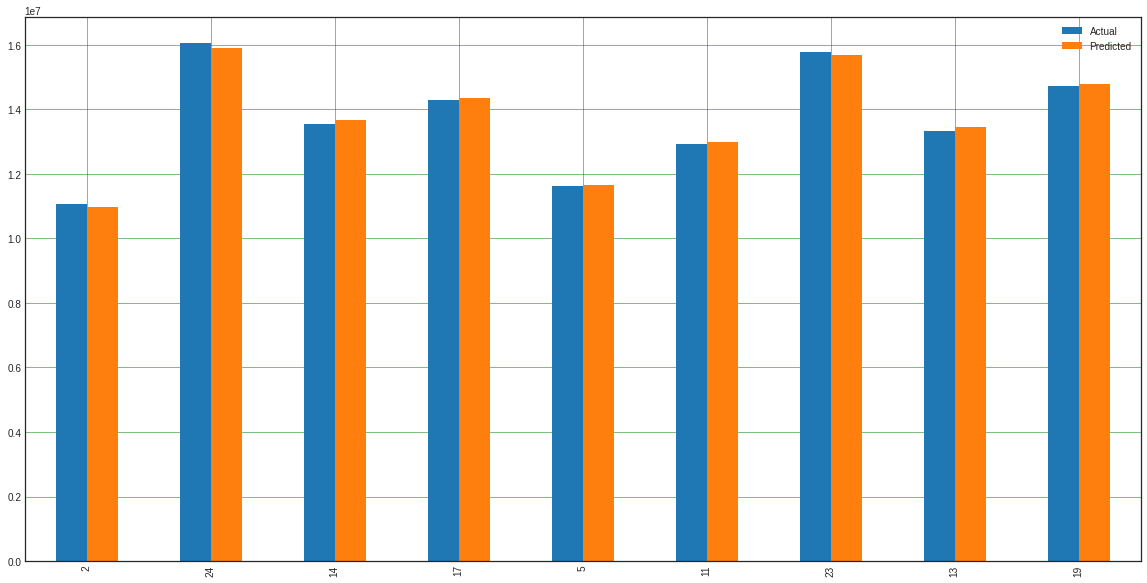

In [17]:
df1 = predicted_dataframe
df1.plot(kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Applying Linear regression on Death Ratio

In [18]:
reg_dataframe = new_df
reg_dataframe['deathratio'] = reg_dataframe['Deaths']/reg_dataframe['Confirmed']
#reg_dataframe = reg_dataframe.fillna(0)
#reg_dataframe
months_wise_death_ratio = reg_dataframe.groupby('Month').sum()

months_wise_death_ratio.to_csv('cases_with_deathratio.csv',index = True)
months_wise_death_ratio

,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,deathratio
Month,,,,,,,
April,167826.10950,184226.091420,63391662,4311214,15944020,43136428,247.145200
February,162231.90585,178085.221706,1663437,46875,363669,1252893,22.452319
January,55942.03650,61408.697140,38534,889,838,36807,3.185610
July,151043.49855,165803.482278,362895848,15709667,199594224,147591957,201.873006
June,167826.10950,184226.091420,246525787,13309053,116984268,116232466,239.199062
March,173420.31315,190366.961134,9002815,397601,2644372,5960842,105.027324
May,173420.31315,190366.961134,144990399,9609604,52876838,82503957,273.128253


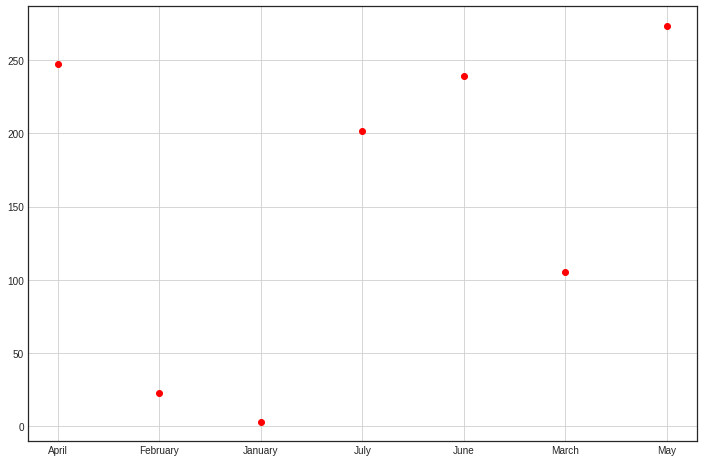

In [26]:
dr_df = pd.read_csv('cases_with_deathratio.csv')


%matplotlib inline 
plt.figure(figsize=(12,8))
#plt.xticks(days)
#plt.yticks(cases.tolist(),label='days')
plt.scatter(dr_df.Month,dr_df.deathratio,color='Red')

#plt.xlabel('Days')
#plt.ylabel('Cases')
plt.grid()


#### Here Object of linear regression is made
#### the function convert the eng_months into num_months (for prediction using linear regression ) 


In [30]:
reg1 = linear_model.LinearRegression()
def months_in_num(dr_df):
    month = dr_df['Month']
    
    if month == 'January':
        return '01'
    elif month == 'February':
        return '02'
    elif month == 'March':
        return '03'
    elif month == 'April':
        return '04'
    elif month == 'May':
        return '05'
    elif month == 'June':
        return '06'
    elif month == 'July':
        return '07'
    elif month == 'August':
        return '08'
    elif month == 'September':
        return '09'
    elif month == 'October':
        return '10'
    elif month == 'November':
        return '11'
    elif month == 'December':
        return '12'

dr_df['Month'] = dr_df.apply(months_in_num , axis=1)


### Predicting the death ratio for months 

In [44]:

reg1 = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(dr_df[['Month']], dr_df.deathratio, test_size=0.4, random_state=0)
reg1.fit(dr_df[['Month']],dr_df.deathratio)
predict1 = reg1.fit(X_train,y_train)
print('Accuracy = : ', predict1.score(X_test,y_test))
print('Prediction1 = :' ,reg1.predict([[8]])) #predting the death ratio of 8th month\
print('Prediction2 = :' ,reg1.predict([[9]]))
print('Prediction3 = :' ,reg1.predict([[7]]))



Accuracy = :  0.23655879417960413
Prediction1 = : [254.03471589]
Prediction2 = : [272.6092385]
Prediction3 = : [235.46019328]


/home/cheese/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/cheese/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/cheese/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Month,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,deathratio
0,04,167826.10950,184226.091420,63391662,4311214,15944020,43136428,247.145200
1,02,162231.90585,178085.221706,1663437,46875,363669,1252893,22.452319
2,01,55942.03650,61408.697140,38534,889,838,36807,3.185610
3,07,151043.49855,165803.482278,362895848,15709667,199594224,147591957,201.873006
4,06,167826.10950,184226.091420,246525787,13309053,116984268,116232466,239.199062
5,03,173420.31315,190366.961134,9002815,397601,2644372,5960842,105.027324
6,05,173420.31315,190366.961134,144990399,9609604,52876838,82503957,273.128253
